## Import all libraries

In [1]:
import csv
import matplotlib.pyplot as plt
import sqlite3

## Set variables

In [2]:
new_file=open("luchtvochtigheid.csv", "w", newline='')
new_file_2=open("doorlooptijden.csv", "w", newline='')
file="bestand.csv"
writer=csv.writer(new_file , delimiter=";")
writer2=csv.writer(new_file_2 , delimiter=";") 

## Make the header row in the new csv file

In [3]:
writer.writerow(['Dag', 'Maand', 'Jaar', 'Gemiddelde_luchtvochtigheid'])

44

## Move the needed data from the old file to the new one

In [4]:
with open(file) as f:
    reader = csv.reader(f, skipinitialspace=True, delimiter=",")
    for _ in range(16):
        next(reader)
    for row in reader:
        content= []
        for column in row:
            if column == row[1]:
                content += [column[6:8]]
                content += [column[4:6]]
                content += [column[0:4]]
            if column == row[2]:
                content += [column]
        writer.writerow(content)

## Close the new file and save the new data

In [5]:
new_file.close()

## Test the content of the new file and show it

In [6]:
with open("bestand2.csv") as f:
    r = csv.reader(f, delimiter=";")
    for row in r:
        print(row)

['Dag', 'Maand', 'Jaar', 'Gemiddelde_luchtvochtigheid']
['01', '01', '2016', '94']
['02', '01', '2016', '89']
['03', '01', '2016', '87']
['04', '01', '2016', '93']
['05', '01', '2016', '88']
['06', '01', '2016', '96']
['07', '01', '2016', '86']
['08', '01', '2016', '81']
['09', '01', '2016', '88']
['10', '01', '2016', '83']
['11', '01', '2016', '93']
['12', '01', '2016', '86']
['13', '01', '2016', '86']
['14', '01', '2016', '89']
['15', '01', '2016', '93']
['16', '01', '2016', '86']
['17', '01', '2016', '84']
['18', '01', '2016', '84']
['19', '01', '2016', '79']
['20', '01', '2016', '85']
['21', '01', '2016', '97']
['22', '01', '2016', '86']
['23', '01', '2016', '96']
['24', '01', '2016', '96']
['25', '01', '2016', '79']
['26', '01', '2016', '83']
['27', '01', '2016', '85']
['28', '01', '2016', '74']
['29', '01', '2016', '81']
['30', '01', '2016', '85']
['31', '01', '2016', '89']


## Add data to variables

In [7]:
with open("bestand2.csv") as f:
    dagen = []
    luchtvochtigheid = []
    timelist = []
    daylist = []
    r = csv.reader(f, delimiter=";")
    next(r)
    for row in r:   
        dagen += [int(row[0])]
        luchtvochtigheid += [int(row[3])]
    print(dagen)
    print(luchtvochtigheid)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[94, 89, 87, 93, 88, 96, 86, 81, 88, 83, 93, 86, 86, 89, 93, 86, 84, 84, 79, 85, 97, 86, 96, 96, 79, 83, 85, 74, 81, 85, 89]


## Plot data

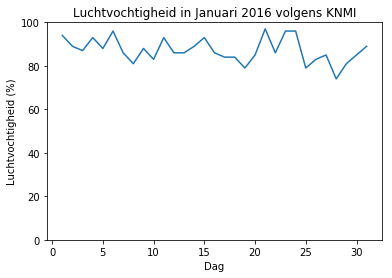

In [8]:
plt.plot(dagen,luchtvochtigheid)
plt.title("Luchtvochtigheid in Januari 2016 volgens KNMI")
plt.xlabel("Dag")
plt.ylabel("Luchtvochtigheid (%)")
plt.ylim(0,100)
plt.show()

## Write data to csv-file

In [9]:
con = sqlite3.connect("NO_XXX_EVENT_EXPORT/bridges.db")
cur = con.cursor()

cur.execute('SELECT Tijd, Waarde, Omschrijving FROM WA WHERE Tijd LIKE "%-01-2016%" AND Omschrijving == "SFC Aandrijving Commando Brug Openen" AND Waarde == "TRUE" OR Tijd LIKE "%-01-2016%" AND Omschrijving == "SFC Aandrijving Commando Brug Sluiten" AND Waarde == "FALSE" ORDER BY Tijd')
writer2.writerow(['Dag', 'Maand', 'Jaar', 'Tijd', 'Open'])
for row in cur.fetchall():
    for column in row:
        if column == row[0]:
            dag = column[0:2]
            maand = column[3:5]
            jaar = column[6:10]
            tijd = column[11:23]
        if column == row[1]:
            opened = column
    writer2.writerow([dag, maand, jaar, tijd, opened])
con.close()
new_file_2.close()

## Calculate times

In [10]:
with open("doorlooptijden.csv") as f:
    first = None
    second = None
    Fday = None
    Sday = None
    r = csv.reader(f, delimiter=";")
    next(r)
    for row in r:
        for column in row:
            if column == row[3]:
                if first == None:
                    Fday = int(row[0])
                    Fhour = int(column[0:2])
                    Fminute = int(column[3:5])
                    Fsecond = int(column[6:8])
                    Fmilisecond = int(column[9:12])
                    first = Fhour*60*60*1000 +Fminute*60*1000 + Fsecond*1000 + Fmilisecond
                else:
                    Sday = int(row[0])
                    Shour = int(column[0:2])
                    Sminute = int(column[3:5])
                    Ssecond = int(column[6:8])
                    Smilisecond = int(column[9:12])
                    second = Shour*60*60*1000 +Sminute*60*1000 + Ssecond*1000 + Smilisecond
                    time_between = second-first
                    if time_between < 0:
                        time_between = second-first+24*60*60*1000
                        
                    if ((Sday-Fday)/2) == 0.5:
                        _day = Fday + 0.5
                    else:
                        _day = Fday
                        
                    print(str(_day)+" "+str("{:02d}".format(int(int((time_between-time_between%1000)/1000)/60)))+":"+str("{:02d}".format(int((time_between-time_between%1000)/1000)%60)))
                    timelist += [time_between/1000]
                    daylist += [_day]
                    first = None
                    second = None    

4 05:06
5 04:45
6 06:08
6 04:46
6 04:57
7 05:06
7 05:03
7 04:04
8 05:37
8 04:54
8 05:46
11 03:26
12 05:01
13 01:43
13 11:31
13 04:21
13 07:32
13 05:34
14 96:15
14 03:27
14 04:13
15 04:28
15 05:00
15 04:35
15 07:54
16 04:33
16 03:51
17 04:59
17 04:05
19 05:52
19 04:39
19 05:22
20 05:13
21 06:41
21 07:37
21 04:50
22 04:28
22 04:59
24 05:02
24 04:52
25 06:05
25 04:48
25 08:38
26 05:05
26 04:24
26 07:12
26 02:33
26 02:45
26 06:06
26 05:59
26 05:15
27 04:28
27 05:15
27 04:06
27 05:24
27 04:59
27 04:34
27 04:34
28 05:34
28 04:07
28 04:20
28 05:02
29 04:38
29 03:43
29.5 04:37
30 05:21
30 04:13
31 04:35


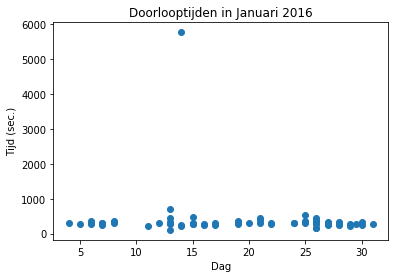

In [11]:
plt.scatter(daylist,timelist)
plt.title('Doorlooptijden in Januari 2016')
plt.xlabel("Dag")
plt.ylabel("Tijd (sec.)")
plt.show()

## Merged plot

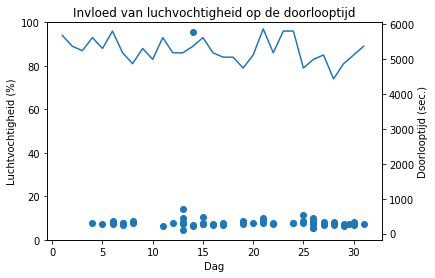

In [12]:
plt.plot(dagen,luchtvochtigheid)
plt.title('Invloed van luchvochtigheid op de doorlooptijd')
plt.ylim(0,100)
plt.ylabel("Luchtvochtigheid (%)")
plt.xlabel("Dag")
plt.twinx()
plt.scatter(daylist,timelist)
plt.ylabel("Doorlooptijd (sec.)")
plt.xlabel("Dag")
plt.show()